### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer,
Chapter 7     

In [1]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [2]:
DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.

dataset_path = 'intermediate_datafiles/'
export_tree_path = 'Example_graphs/Chapter7/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

if not os.path.exists(export_tree_path):
    os.makedirs(export_tree_path)

dataset.index = dataset.index.to_datetime()

C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [3]:
del dataset['participant']
del dataset['category']
del dataset['set']

In [4]:
# Let us consider our first task, namely the prediction of the label. We consider this as a non-temporal task.

# We create a single column with the categorical attribute representing our class. Furthermore, we use 70% of our data
# for training and the remaining 30% as an independent test set. We select the sets based on stratified sampling. We remove
# cases where we do not know the label.

prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)
#train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.01, filter=True, temporal=False)

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

Training set length is:  4236
Test set length is:  1816


In [5]:
# Select subsets of the features that we will consider:

basic_features = ['acc_x','acc_y','acc_z', 'gyr_x','gyr_y','gyr_z', 'acc_r', 'gyr_r']
pca_features = ['pca_1','pca_2','pca_3']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
cluster_features = ['cluster']
print '#cluster features: ', len(cluster_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))

#basic features:  8
#PCA features:  3
#time features:  16
#frequency features:  58
#cluster features:  1


In [ ]:
# First, let us consider the performance over a selection of features:

fs = FeatureSelectionClassification()

features, ordered_features, ordered_scores = fs.forward_selection(86, train_X[features_after_chapter_5], train_y)
print ordered_scores
print ordered_features

plot.plot(range(1, 87), ordered_scores)
plot.xlabel('number of features')
plot.ylabel('accuracy')
plot.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [10]:
ordered_features[:20]

['pca_1',
 'gyr_r_freq_0.0_Hz_ws_50',
 'acc_z',
 'acc_y_temp_mean_ws_5',
 'acc_x_temp_mean_ws_5',
 'acc_y_temp_std_ws_5',
 'gyr_r_freq_2.2_Hz_ws_50',
 'gyr_r_freq_1.4_Hz_ws_50',
 'gyr_r_freq_2.3_Hz_ws_50',
 'acc_r_max_freq',
 'gyr_r_freq_1.3_Hz_ws_50',
 'gyr_z_temp_std_ws_5',
 'gyr_r_freq_1.7_Hz_ws_50',
 'gyr_r_freq_0.9_Hz_ws_50',
 'gyr_r_freq_2.5_Hz_ws_50']

In [12]:
selected_features = ordered_features[:10]

C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


[0.99985207100591711, 0.9999506903353057, 0.99980276134122281, 0.99853714661406967, 0.98872452333990801, 0.89853714661406969]
[0.9457055214723924, 0.94823619631901823, 0.94620398773006131, 0.93508435582822069, 0.90417944785276061, 0.85329754601227015]


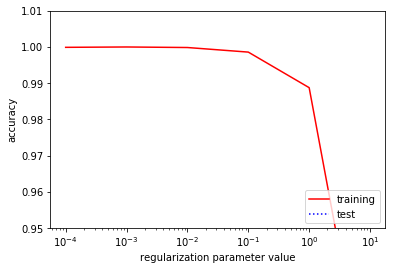

In [13]:
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()

reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
performance_training = []
performance_test = []

# We repeat the experiment a number of times to get a bit more robust data as the initialization of the NN is random.

repeats = 20

for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(train_X, train_y,
                                                                                                            test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
                                                                                                            gridsearch=False)
        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/repeats)
    performance_test.append(performance_te/repeats)

plot.hold(True)
plot.semilogx(reg_parameters, performance_training, 'r-')
plot.semilogx(reg_parameters, performance_test, 'b:')
print performance_training
print performance_test
plot.xlabel('regularization parameter value')
plot.ylabel('accuracy')
plot.ylim([0.95, 1.01])
plot.legend(['training', 'test'], loc=4)
plot.hold(False)

plot.show()

C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


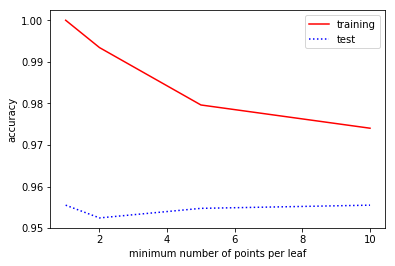

In [14]:
# Second, let us consider the influence of certain parameter settings (very related to the regulariztion) and study the impact on performance.

leaf_settings = [1,2,5,10]
performance_training = []
performance_test = []

for no_points_leaf in leaf_settings:
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features], min_samples_leaf=no_points_leaf,
                                                                                               gridsearch=False, print_model_details=False)
    performance_training.append(eval.accuracy(train_y, class_train_y))
    performance_test.append(eval.accuracy(test_y, class_test_y))

plot.hold(True)
plot.plot(leaf_settings, performance_training, 'r-')
plot.plot(leaf_settings, performance_test, 'b:')
plot.xlabel('minimum number of points per leaf')
plot.ylabel('accuracy')
plot.legend(['training', 'test'], loc=1)
plot.hold(False)

plot.show()

In [14]:
# So yes, it is important :) Therefore we perform grid searches over the most important parameters, and do so by means
# of cross validation upon the training set.


possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, features_after_chapter_5, selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Selected features']
repeats = 5

scores_over_all_algs = []

for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]

    # First we run our non deterministic classifiers a number of times to average their score.

    performance_tr_nn = 0
    performance_tr_rf = 0
    performance_tr_svm = 0
    performance_te_nn = 0
    performance_te_rf = 0
    performance_te_svm = 0

    for repeat in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_nn += eval.accuracy(train_y, class_train_y)
        performance_te_nn += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y, model = learner.random_forest(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_rf += eval.accuracy(train_y, class_train_y)
        performance_te_rf += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_svm += eval.accuracy(train_y, class_train_y)
        performance_te_svm += eval.accuracy(test_y, class_test_y)


    overall_performance_tr_nn = performance_tr_nn/repeats
    overall_performance_te_nn = performance_te_nn/repeats
    overall_performance_tr_rf = performance_tr_rf/repeats
    overall_performance_te_rf = performance_te_rf/repeats
    overall_performance_tr_svm = performance_tr_svm/repeats
    overall_performance_te_svm = performance_te_svm/repeats

    # And we run our deterministic classifiers:


    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_knn = eval.accuracy(train_y, class_train_y)
    performance_te_knn = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_dt = eval.accuracy(train_y, class_train_y)
    performance_te_dt = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(selected_train_X, train_y, selected_test_X)
    performance_tr_nb = eval.accuracy(train_y, class_train_y)
    performance_te_nb = eval.accuracy(test_y, class_test_y)

    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                                (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                                (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                                (performance_tr_knn, performance_te_knn),
                                                                                                (performance_tr_dt, performance_te_dt),
                                                                                                (performance_tr_nb, performance_te_nb)])
    scores_over_all_algs.append(scores_with_sd)

NameError: name 'selected_features' is not defined

In [ ]:
DataViz.plot_performances_classification(['NN', 'RF', 'SVM', 'KNN', 'DT', 'NB'], feature_names, scores_over_all_algs)

In [ ]:
# And we study two promising ones in more detail. First let us consider the random forrest which works best with the selected
# features.

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(train_X[features_after_chapter_5], train_y, test_X[features_after_chapter_5],
                                                                                           gridsearch=True, print_model_details=True)

test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)